# 3. Notebook: Multivarite Analysis

## 0. import the packages and the dataset 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [38]:
df_cars_final=pd.read_csv('df_cars_final.csv')

In [39]:
y=df_cars_final['PriceEUR']
X=df_cars_final.drop(['PriceEUR','Unnamed: 0'], axis=1)

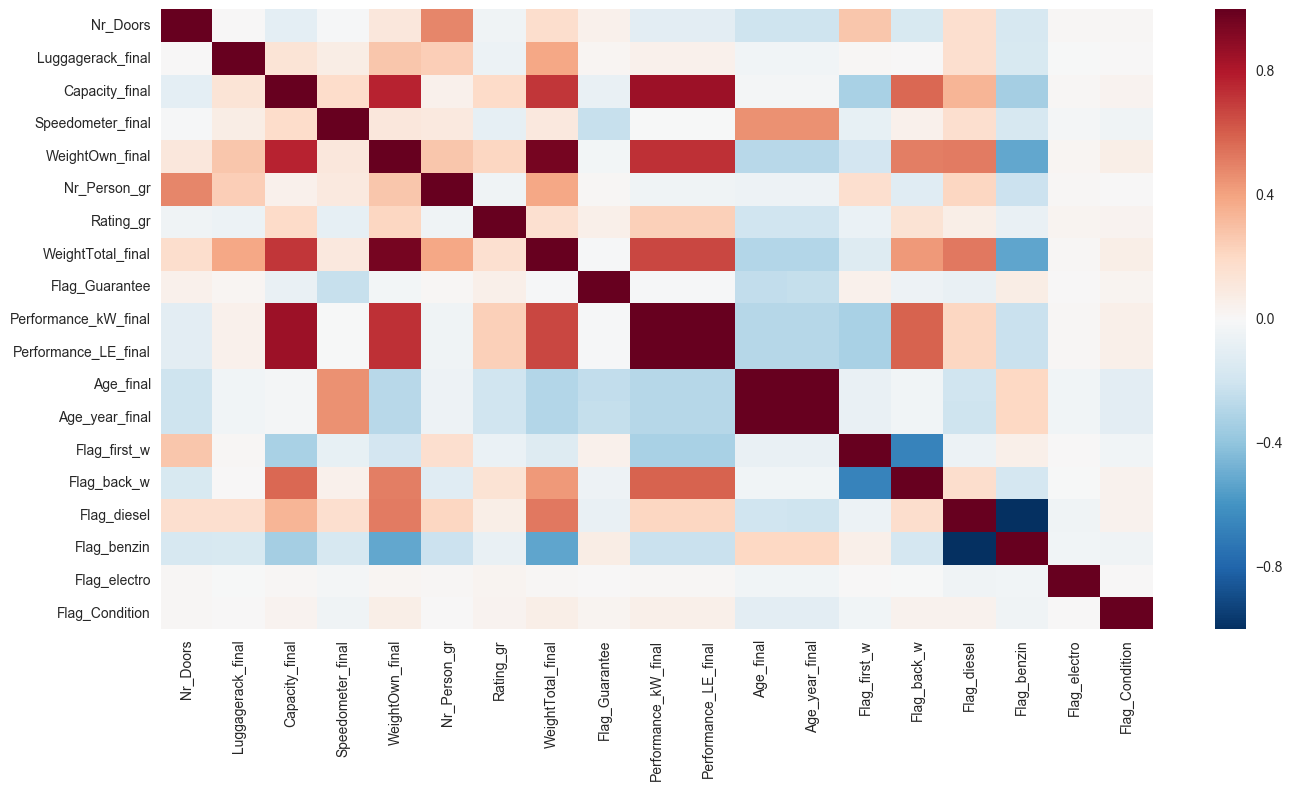

In [41]:
import seaborn as sns
df_cars_final_temp=df_cars_final.iloc[:,:20]
df_cars_final_temp=df_cars_final_temp.drop('Unnamed: 0', axis=1)
df_cars_final_temp.head()
df_corr=df_cars_final_temp.corr()
plt.figure(figsize=(16,8))
sns.heatmap(df_corr)
plt.savefig('correlation_heatmap1')


df_cars_final=df_cars_final.drop(['Performance_LE_final', 'WeightOwn_final', 'Flag_benzin'], axis=1)

In [44]:
df_cars_final_temp.head()
y=df_cars_final['PriceEUR']
X=df_cars_final.drop(['PriceEUR','Unnamed: 0'], axis=1)

X.head()

,Nr_Doors,Luggagerack_final,Capacity_final,Speedometer_final,Nr_Person_gr,Rating_gr,WeightTotal_final,Flag_Guarantee,Performance_kW_final,Age_final,...,SUBARU,LANCIA,JAGUAR,SAAB,JEEP,PORSCHE,ROVER,DAIHATSU,SSANGYONG,Price_avg
0,5.0,450.0,1995.0,196624.0,3,3,2320.0,0,110.0,3668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14851.831050
1,5.0,280.0,1197.0,38000.0,2,3,1620.0,0,66.0,1356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3232.922631
2,5.0,500.0,1998.0,250000.0,2,2,2005.0,0,96.0,3668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7287.400570
3,5.0,560.0,1995.0,249000.0,2,2,2365.0,0,135.0,2541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14430.805659
4,5.0,295.0,1388.0,71000.0,2,2,1495.0,0,71.0,2572,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4588.749014


## 1. Scale the dataset

In [45]:
#scale the dataset: the variables have different scales 
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

## 2. Split the dataset

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.3,random_state=0)

## 3. Multivariate analysis

In [47]:
#import packages
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from time import time
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV

In [48]:
def test_classifier(X_train, y_train, X_test, y_test, classifier):
    print("")
    print("==================================================================================")
    classifier_name = str(type(classifier).__name__)
    print("Testing " + classifier_name)
    now = time()
    list_of_labels = sorted(list(set(y_train)))
    model = classifier.fit(X_train, y_train)
    print("Learing time {0}s".format(time() - now))
    now = time()
    predictions = model.predict(X_test)
    predictions_train = model.predict(X_train)
    print("Predicting time {0}s".format(time() - now))
    r2_test = r2_score(y_test, predictions)
    mse_test = mean_squared_error(y_test, predictions)
    r2_train = r2_score(y_train, predictions_train)
    mse_train = mean_squared_error(y_train, predictions_train)

    print("=================================== Results Training set======================================")
    print("         bias")
    print("MSE       " + str(mse_train))
    print("R2        " + str(r2_train))
    print("=================================== Results Testing set======================================")
    print("         bias")
    print("MSE       " + str(mse_test))
    print("R2        " + str(r2_test))
    
    print("===================================================================================")

    return model

### 3.1 Linear Regression

In [49]:
lr=LinearRegression()
test_classifier(X_train, y_train, X_test, y_test, lr)


Testing LinearRegression
Learing time 0.3102378845214844s
Predicting time 0.009066104888916016s
=================================== Results Training set======================================
         bias
MSE       17358532.1661
R2        0.753910338952
=================================== Results Testing set======================================
         bias
MSE       17817958.2929
R2        0.750893862596


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 3.2 Linear regression  with SelectKBest

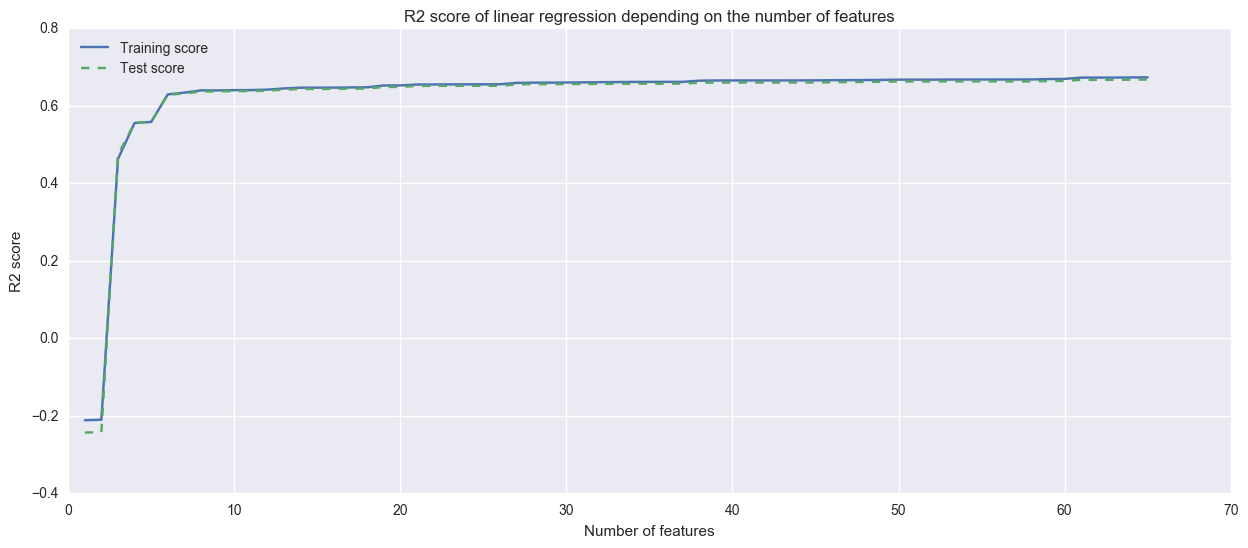

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

training_error=[]
test_error=[]
training_score=[]
test_score=[]
n_col=len(X.columns)

vals=np.arange(1,n_col+1)
for k in vals:
    pip=Pipeline([('sel', SelectKBest(f_regression, k)), ('lr', LinearRegression())])
    pip.fit(X_train, y_train)
    test_error.append(mean_squared_error(pip.predict(X_test), y_test))
    training_error.append(mean_squared_error(pip.predict(X_train), y_train))
    test_score.append(r2_score(pip.predict(X_test), y_test))
    training_score.append(r2_score(pip.predict(X_train), y_train))
    
fig, ax=plt.subplots(figsize=(15,6))
ax.plot(vals, training_score, label='Training score')
ax.plot(vals, test_score,'--', label='Test score')

#ax2 = ax.twinx()
#ax2.plot(vals, training_error, label='Training error')
#ax2.plot(vals, test_error, label='Test error')
#ax2.set_ylabel('R2 score', color='b')
plt.ylabel('R2 score')
plt.xlabel('Number of features')
plt.legend(loc='best')
plt.title('R2 score of linear regression depending on the number of features')
plt.savefig('select_k_linreg')

In [ ]:
### 3.3 Linear Regression with polinomial features

In [51]:
#Build a pipeline for polynomial fitting, fit polynomials of degree 1 to the number of features, 
#and plot your training and testing errors for each


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
degrees=4

poly_training_error=[]
poly_test_error=[]
poly_training_r2=[]
poly_test_r2=[]
for d in np.arange(1,degrees):
    pip=Pipeline([('sel', SelectKBest(f_regression, 20)), ('poly', PolynomialFeatures(degree=d)), ('lr', LinearRegression())])
    pip.fit(X_train, y_train)
    poly_test_error.append(mean_squared_error(pip.predict(X_test), y_test))
    poly_training_error.append(mean_squared_error(pip.predict(X_train), y_train))
    poly_test_r2.append(r2_score(pip.predict(X_test), y_test))
    poly_training_r2.append(r2_score(pip.predict(X_train), y_train))

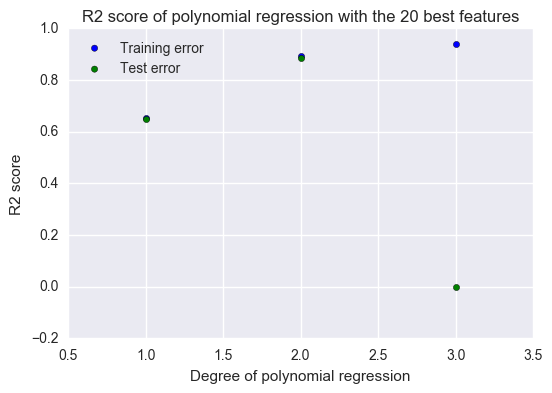

In [52]:
fig, ax=plt.subplots()

plt.scatter(np.arange(1,degrees), poly_training_r2,c='b', label='Training error')
plt.scatter(np.arange(1,degrees), poly_test_r2,c='g', label='Test error')
plt.legend(loc='upper left')
plt.ylabel('R2 score')
plt.xlabel('Degree of polynomial regression')
plt.title('R2 score of polynomial regression with the 20 best features')
plt.savefig('select_k_linreg_poli20')

In [29]:
np.arange(1,degrees)

array([1, 2, 3, 4])

In [2]:
### 3.4 Ridge regression with parameter tuning

In [53]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=0)
alphas=[10**i for i in range(-7,0)]

parameters = [{'alpha': alphas}]

clf = GridSearchCV(ridge, parameters, cv=3)
clf.fit(X_train, y_train)

scores_ridge = clf.cv_results_['mean_test_score']
scores_std_ridge = clf.cv_results_['std_test_score']

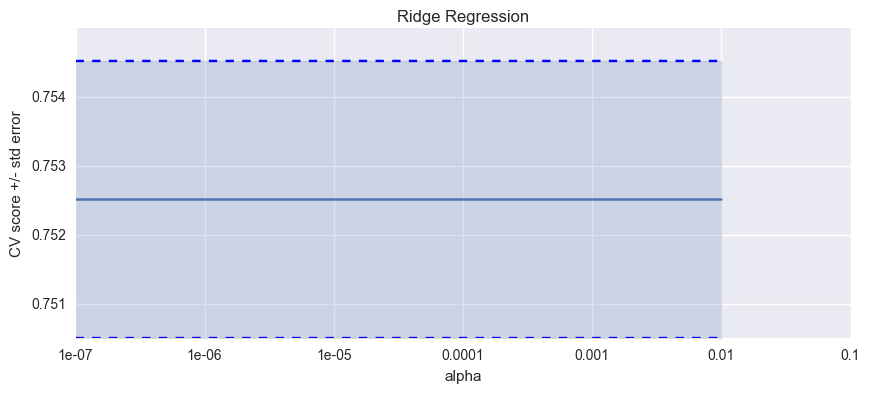

In [54]:
fig, ax= plt.subplots(figsize=(10,4))
plt.plot(alphas, scores_ridge)

# plot error lines showing +/- std. errors of the scores
std_error_ridge = scores_std_ridge / np.sqrt(3)

plt.plot(alphas, scores_ridge + std_error_ridge, 'b--')
plt.plot(alphas, scores_ridge - std_error_ridge, 'b--')

plt.fill_between(alphas, scores_ridge + std_error_ridge, scores_ridge - std_error_ridge, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.title('Ridge Regression')
ax.set_xticklabels(alphas)

### 3.5 Lasso regression with parameter tuning

In [55]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=0)
alphas=[10**i for i in range(-7,0)]

parameters = [{'alpha': alphas}]

clf = GridSearchCV(lasso, parameters, cv=3)
clf.fit(X_train, y_train)

scores_lasso = clf.cv_results_['mean_test_score']
scores_std_lasso = clf.cv_results_['std_test_score']

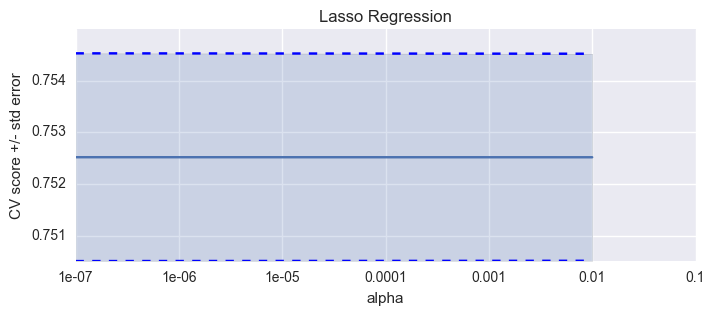

In [56]:
fig, ax= plt.subplots(figsize=(8,3))
plt.plot(alphas, scores_lasso)

# plot error lines showing +/- std. errors of the scores
std_error_lasso = scores_std_lasso / np.sqrt(3)

plt.plot(alphas, scores_lasso + std_error_lasso, 'b--')
plt.plot(alphas, scores_lasso - std_error_lasso, 'b--')

plt.fill_between(alphas, scores_lasso + std_error_lasso, scores_lasso - std_error_lasso, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.title('Lasso Regression')
ax.set_xticklabels(alphas)

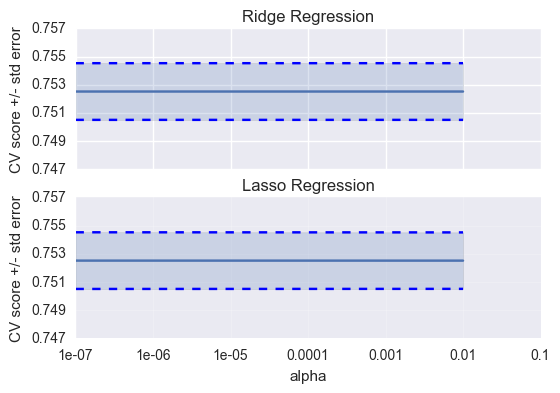

In [59]:
#########################################################
major_ticks = np.arange(0.747, 0.757, 0.002)

fig, ax= plt.subplots(2,1,sharex=True)
ax[0].plot(alphas, scores_ridge)
# plot error lines showing +/- std. errors of the scores
ax[0].plot(alphas, scores_ridge + std_error_ridge, 'b--')
ax[0].plot(alphas, scores_ridge - std_error_ridge, 'b--')
ax[0].fill_between(alphas, scores_ridge + std_error_ridge, scores_ridge - std_error_ridge, alpha=0.2)

ax[0].set_ylabel('CV score +/- std error')
#ax[0].set_xlabel('alpha')
ax[0].set_title('Ridge Regression')
#ax[0].set_xticklabels(alphas[:-1])
ax[0].set_yticks(major_ticks)

ax[1].plot(alphas, scores_lasso)
# plot error lines showing +/- std. errors of the scores
ax[1].plot(alphas, scores_lasso + std_error_lasso, 'b--')
ax[1].plot(alphas, scores_lasso - std_error_lasso, 'b--')
ax[1].fill_between(alphas, scores_lasso + std_error_lasso, scores_lasso - std_error_lasso, alpha=0.2)
ax[1].set_ylabel('CV score +/- std error')
ax[1].set_xlabel('alpha')
ax[1].set_title('Lasso Regression')
ax[1].set_xticklabels(alphas)
ax[1].grid(which='major', alpha=0.2)
ax[1].set_yticks(major_ticks)
plt.savefig('Ridge_and_lasso_reg')

In [4]:
### 3.6 Decision Tree Regressor with parameter tuning

In [60]:
from sklearn.tree import DecisionTreeRegressor

params={"max_features":["auto","sqrt","log2"], "min_samples_split":[40, 60,80], "max_depth":[10,20, 30], "max_leaf_nodes":[10, 20, 30],"min_samples_leaf":[10, 20,30]}

dtree=DecisionTreeRegressor(random_state=0)

clf = GridSearchCV(dtree, params, cv=3)
clf.fit(X_train, y_train)

scores_tree = clf.cv_results_['mean_test_score']
scores_tree_std = clf.cv_results_['std_test_score']

In [61]:
print('Best parameter: ', clf.best_params_ )
print('Best score: ',clf.best_score_)

Best parameter:  {'max_features': 'auto', 'min_samples_leaf': 20, 'max_leaf_nodes': 30, 'max_depth': 10, 'min_samples_split': 40}
Best score:  0.851688295579


In [62]:
best_clf=clf.best_estimator_

test_classifier(X_train, y_train, X_test, y_test, best_clf)


Testing DecisionTreeRegressor
Learing time 0.4994978904724121s
Predicting time 0.020612001419067383s
=================================== Results Training set======================================
         bias
MSE       10012728.609
R2        0.858050844047
=================================== Results Testing set======================================
         bias
MSE       10430268.9886
R2        0.854178353259


DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
           max_leaf_nodes=30, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=40, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [63]:
from io import StringIO
#import StringIO.StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(best_clf, out_file=dot_data, max_depth=3, feature_names=X.columns,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
plt.savefig('Decision_tree_depth_3')

In [ ]:

importances = best_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r",  align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### 3.7 Random Forest Regression with parameter tuning

In [ ]:
#parameters tuning is based on the deecesion tree regressor
from sklearn.ensemble import RandomForestRegressor

params_rf={"n_estimators": [25, 50,100]}
rf=RandomForestRegressor(random_state=0, max_features='auto', max_depth=10, max_leaf_nodes=30, min_samples_leaf=10, min_samples_split=60)

clf_rf = GridSearchCV(rf, params_rf, cv=3)
clf_rf.fit(X_train, y_train)

scores_rf = clf_rf.cv_results_['mean_test_score']
scores_rf_std = clf_rf.cv_results_['std_test_score']

In [ ]:
scores_rf

In [ ]:
best_clf_rf=clf_rf.best_estimator_

test_classifier(X_train, y_train, X_test, y_test, best_clf_rf)

In [5]:
### 3.8 Support verctor machine

In [12]:
from sklearn.svm import SVR
params_svr=[{"kernel": ["rbf"], "C": [1e1,  1e3]},
            {"kernel": ["linear"], "C": [1e1,  1e3]} ,
            {"kernel": ["poly"], "C": [1e1,  1e3] }]


svr =SVR()
clf_svr=GridSearchCV(svr, params_svr, cv=3)
                   
clf_svr.fit(X_train, y_train)

scores_svr = clf_svr.cv_results_['mean_test_score']
scores_svr_std = clf_svr.cv_results_['std_test_score']

In [14]:
best_clf_svr=clf_svr.best_estimator_

test_classifier(X_train, y_train, X_test, y_test, best_clf_svr)


Testing SVR
Learing time 554.2556738853455s
Predicting time 1374.3636920452118s
=================================== Results Training set======================================
         bias
MSE       6357946.7468
R2        0.909864212889
=================================== Results Testing set======================================
         bias
MSE       6569699.00487
R2        0.908151522407


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
### 3.6 Boosting?
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

r2_test = []
mse_test = []
r2_train = []
mse_train= []
    
dtree=DecisionTreeRegressor(max_depth= 10, min_samples_leaf= 20, max_leaf_nodes= 30, max_features= 'auto', min_samples_split= 40)
for i in np.arange(1,30):
    boost = AdaBoostRegressor(dtree, n_estimators=i)
    model = boost.fit(X_train, y_train)
    predictions = model.predict(X_test)
    predictions_train = model.predict(X_train)
    r2_test.append(r2_score(y_test, predictions))
    mse_test.append(mean_squared_error(y_test, predictions))
    r2_train.append(r2_score(y_train, predictions_train))
    mse_train.append(mean_squared_error(y_train, predictions_train))
    

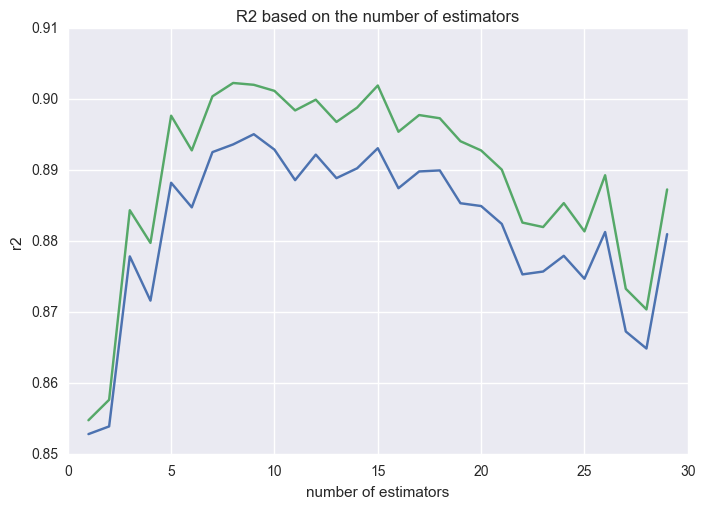

In [32]:
plt.plot(np.arange(1,30), r2_test)
plt.plot(np.arange(1,30), r2_train)

plt.ylabel('r2')
plt.xlabel('number of estimators')
plt.title('R2 based on the number of estimators')


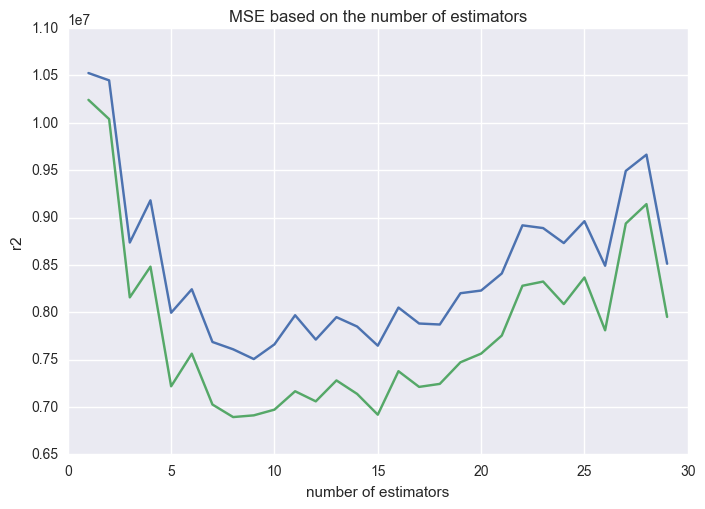

In [34]:
plt.plot(np.arange(1,30), mse_test)
plt.plot(np.arange(1,30), mse_train)

plt.ylabel('r2')
plt.xlabel('number of estimators')
plt.title('MSE based on the number of estimators')

In [35]:
#n_estimators=8 -> best r2

boost = AdaBoostRegressor(dtree, n_estimators=8)
test_classifier(X_train, y_train, X_test, y_test, boost)



Testing AdaBoostRegressor
Learing time 4.075315952301025s
Predicting time 0.1050269603729248s
=================================== Results Training set======================================
         bias
MSE       6962643.01154
R2        0.901291512306
=================================== Results Testing set======================================
         bias
MSE       7565809.31313
R2        0.894225280846


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
           max_leaf_nodes=30, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=40, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=8,
         random_state=None)

In [36]:
######best models:
#SVR or random forest:

#create data for a new car:
X.columns

nr_doors=
luggagerack=
capacity=
speedometer=
weightown=
nr_person=
rating=


Index(['Nr_Doors', 'Luggagerack_final', 'Capacity_final', 'Speedometer_final',
       'WeightOwn_final', 'Nr_Person_gr', 'Rating_gr', 'WeightTotal_final',
       'Flag_Guarantee', 'Performance_kW_final', 'Performance_LE_final',
       'Age_final', 'Age_year_final', 'Flag_first_w', 'Flag_back_w',
       'Flag_diesel', 'Flag_benzin', 'Flag_electro', 'Flag_Condition', 'A',
       'B', 'C', 'D', 'E', 'F', 'S', 'SUV', 'OPEL', 'VOLKSWAGEN', 'BMW',
       'FORD', 'MERCEDES-BENZ', 'AUDI', 'RENAULT', 'TOYOTA', 'SKODA',
       'PEUGEOT', 'MAZDA', 'SUZUKI', 'FIAT', 'CITROEN', 'NISSAN', 'HONDA',
       'VOLVO', 'SEAT', 'HYUNDAI', 'KIA', 'MITSUBISHI', 'ALFA ROMEO',
       'CHEVROLET', 'DAEWOO', 'DACIA', 'CHRYSLER', 'SMART', 'LADA',
       'LAND ROVER', 'MINI', 'LEXUS', 'SUBARU', 'LANCIA', 'JAGUAR', 'SAAB',
       'JEEP', 'PORSCHE', 'ROVER', 'DAIHATSU', 'SSANGYONG', 'Price_avg'],
      dtype='object')